### HW4     Simulation of Income

### Name:  Weiwei ZHENG

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.mlab as mlab
import scipy.stats as st

In [107]:
def wealth_simulation(p):
    '''
    Based on parameters given by the problem set and return the matrix
    '''
    
    np.random.seed(524)
    errors = np.random.normal(0, p["sigma"], (p["years"], p["num_draws"]))
    ln_wealth_mat = np.zeros((p["years"], p["num_draws"]))
    ln_wealth_mat[0, :] = np.log(p["inc0"]) + errors[0, :]  
    for yr in range(1, p["years"]):
        ln_wealth_mat[yr, :] = (1 - p["ro"]) * (np.log(p["inc0"]) + p["gr"] * yr) +\
                             p["ro"] * ln_wealth_mat[yr - 1, :] + errors[yr, :]

    return ln_wealth_mat    

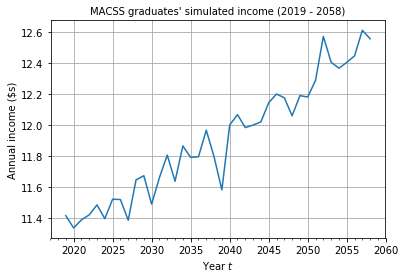

In [108]:
# Question 1

profile_1 = {"st_year": 2019, "inc0": 80000, "ro": 0.2, "gr": 0.03, "years": 40, 
             "sigma": 0.1, "num_draws": 10000}
ln_wealth_mat = wealth_simulation(profile_1)
    
%matplotlib inline
p = profile_1
year_vec = np.arange(p["st_year"], p["st_year"] + p["years"])
sample = 500
fig, ax = plt.subplots()
plt.plot(year_vec, ln_wealth_mat[:, sample])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title("MACSS graduates' simulated income (2019 - 2058)", fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

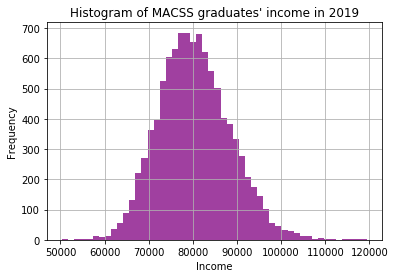

The percentage of graduates whose income is more than $100,000 is 0.0127
The percentage of graduates whose income is less than $70,000 is 0.0902
The distribution is normal distributed.


In [109]:
# Question 2

inc_2019 = np.exp(ln_wealth_mat[0, :])
mu, sigma = inc_2019.mean(), inc_2019.std()
n, bins, patches = plt.hist(inc_2019, 50, facecolor='purple', alpha=0.75)
plt.xlabel(r'Income')
plt.ylabel('Frequency')
plt.title("Histogram of MACSS graduates' income in 2019")
plt.grid(True)
plt.show()
p_hundthous = inc_2019[inc_2019 > 100000].shape[0]/inc_2019.shape[0]
print("The percentage of graduates whose income is more than $100,000 is {}".format(p_hundthous))
p_hundthous = inc_2019[inc_2019 < 70000].shape[0]/inc_2019.shape[0]
print("The percentage of graduates whose income is less than $70,000 is {}".format(p_hundthous))
if st.mstats.normaltest(inc_2019, axis=0)[1] < 0.05:
    print("The distribution is normal distributed.")
else:
    print("The distribution is not normal distributed.")

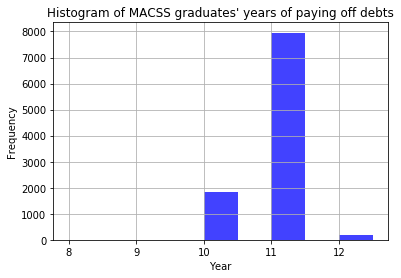

The percentage of graduates who can pay off debts in ten years is 0.18469999999999998


In [110]:
# Question 3
debt_income = np.exp(ln_wealth_mat) * 0.1
cum = np.cumsum(debt_income, axis = 0) 
yrs_l = np.zeros(p["num_draws"])
for num in range(p["num_draws"]):
    yrs = np.sum(cum[:, num] < 95000)
    yrs_l[num] = yrs + 1

bins_array = np.arange(yrs_l.min() - 1, yrs_l.max() + 1, 0.5)
n, bins, patches = plt.hist(yrs_l, bins_array, facecolor='blue', alpha=2.75)
plt.xlabel(r'Year')
plt.ylabel('Frequency')
plt.title("Histogram of MACSS graduates' years of paying off debts")
plt.grid(True)
plt.show()
over_ten = 1 - np.sum(yrs_l > 10)/p["num_draws"]
print("The percentage of graduates who can pay off debts in ten years is {}".format(over_ten))

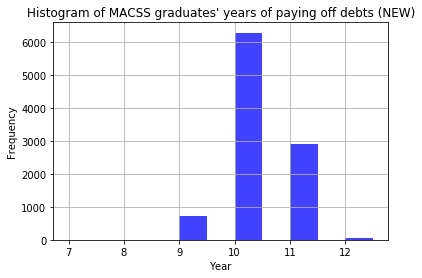

The percentage of graduates who can pay off debts in ten years is 0.702


In [116]:
# Question 4
profile_2 = {"st_year": 2019, "inc0": 85000, "ro": 0.2, "gr": 0.03, "years": 40, 
             "sigma": 0.15, "num_draws": 10000}
ln_wealth_new = wealth_simulation(profile_2)
debt_income = np.exp(ln_wealth_new) * 0.1
cum = np.cumsum(debt_income, axis = 0) 
yrs_l = np.zeros(p["num_draws"])
for num in range(p["num_draws"]):
    yrs = np.sum(cum[:, num] < 95000)
    yrs_l[num] = yrs + 1

bins_array = np.arange(yrs_l.min() - 1, yrs_l.max() + 1, 0.5)
n, bins, patches = plt.hist(yrs_l, bins_array, facecolor='blue', alpha=2.75)
plt.xlabel(r'Year')
plt.ylabel('Frequency')
plt.title("Histogram of MACSS graduates' years of paying off debts (NEW)")
plt.grid(True)
plt.show()
over_ten = 1 - np.sum(yrs_l > 10)/p["num_draws"]
print("The percentage of graduates who can pay off debts in ten years is {}".format(over_ten))